In [1]:
%reset -f
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

In [2]:
data = {}
for root, dirs, files in os.walk("."):
    for name in files:
        if 'xlsx' in name:
            print(os.path.join(root, name))
            key = name[name.find('_')+1:name.rfind('.xlsx')]
            
            data[key] =pd.read_excel('./'+name,skiprows=7)
            data[key]  = data[key].set_index('Datum')

            
            

./01_Projektion.xlsx
./02_Stimmung.xlsx
./03_Keine_Wahlabsicht_1.xlsx
./04_Koalition_1.xlsx
./04b_Bundeskanzler_1.xlsx
./05_Arbeit_BR.xlsx
./06_Zuf_Reg_1.xlsx
./07_Zuf_Opp_1.xlsx
./08_Sympathiewerte_1.xlsx
./09_Probleme_1.xlsx
./10_Probleme_2.xlsx
./11_Wirtschaft_allg_2.xlsx
./12_Wirtschaft_eig_1.xlsx
./13_Wirtschaft_Entw.xlsx
./14_Kompetenz_Wirtschaft_2.xlsx
./15_Kompetenz_Arbeit_1.xlsx
./16_Kompetenz_Soziales_1.xlsx
./17_Kompetenz_soz_Ger.xlsx


In [3]:
myframe = data['Probleme_2']
myframe2 = data['Zuf_Reg_1']

In [4]:
frames = []
for key in data:
    mask = (data[key]).index > '2013-01-01'
    data[key]  = data[key][mask]
    #data[key]  = (data[key]).dropna(axis=1,how='all')
    
    frames.append(data[key])

In [5]:
new = frames[0]
for i in range(1,len(frames)):
    new = new.merge(frames[i], how='outer', left_index=True, right_index=True)




In [6]:
new = frames[0]
for i in range(1,len(frames)):
    new = new.merge(frames[i], how='outer', left_index=True, right_index=True)



#for k in range(89):
#    print(k, new.ix[:,k].name)
    
    
mask = np.invert(['Unnamed' in test for test in new.columns.values])
new = new.loc[:, np.logical_and(new.dtypes == np.float64,mask)]
new.columns= [string if not '_x' in string else string[:string.rfind('_x')] for string in new.columns.values ]

In [7]:

heat= new.fillna(0).corr(min_periods=80).ix[:7,:]

/opt/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


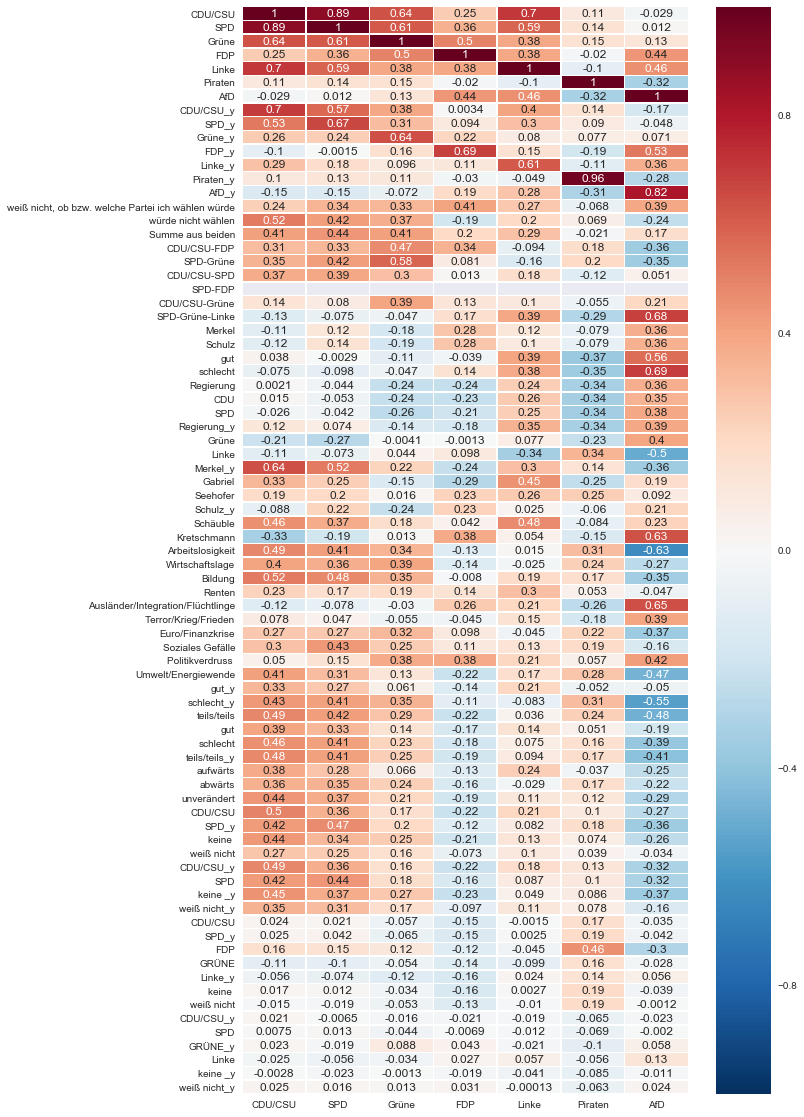

In [8]:
fig, ax = plt.subplots(figsize=(10,20))         # Sample figsize in inches

sns.heatmap(heat.T, annot=True, linewidths=.5, ax=ax)



In [288]:
#plt.plot(new['Kretschmann'],lw=5)
(new['Arbeitslosigkeit'].fillna(0)).corr(new['CDU/CSU'].ix[:,0].fillna(0))


/opt/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


0.42400896173642394

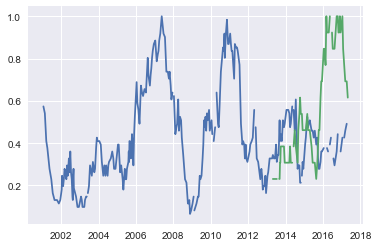

In [320]:
plt.plot(new['aufwärts']/np.max(new['aufwärts']))
plt.plot(new['AfD']/np.max(new['AfD']))

In [ ]:
new['Arbeitslosigkeit']